## Bhuvnesh Sahu 
- MDS202316

In [1]:
import pandas as pd
import csv
import numpy as np
import re
import nltk
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [2]:
df = pd.read_csv("SMSSpamCollection", sep='\t', names=["target", "text"])

In [3]:
df.sample(5)

,target,text
3259,ham,He fucking chickened out. He messaged me he wo...
4978,ham,"A boy was late 2 home. His father: ""POWER OF F..."
2535,ham,Ok enjoy . R u there in home.
4099,ham,I think just yourself …Thanks and see you tomo
5441,ham,"By the way, make sure u get train to worc fore..."


In [4]:
df.shape

(5572, 2)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df['target'] = encoder.fit_transform(df['target'])

In [7]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

## 2.EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

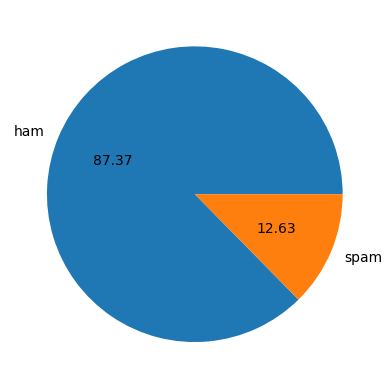

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# Data is imbalanced

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Bhuvnesh's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters'] = df['text'].apply(len)

In [19]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,79.344554,18.593538
std,58.437457,13.402779
min,2.000000,1.000000
25%,36.000000,9.000000
50%,61.000000,15.000000
75%,119.000000,26.000000
max,910.000000,220.000000


In [23]:
# ham
df[df['target'] == 0][['num_characters','num_words']].describe()

,num_characters,num_words
count,4516.000000,4516.000000
mean,70.905890,17.267715
std,56.715046,13.588065
min,2.000000,1.000000
25%,34.000000,8.000000
50%,53.000000,13.000000
75%,91.000000,22.000000
max,910.000000,220.000000


In [25]:
#spam
df[df['target'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.704441,27.762634
std,29.821348,6.993008
min,13.000000,2.000000
25%,132.000000,25.000000
50%,148.000000,29.000000
75%,157.000000,32.000000
max,223.000000,46.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

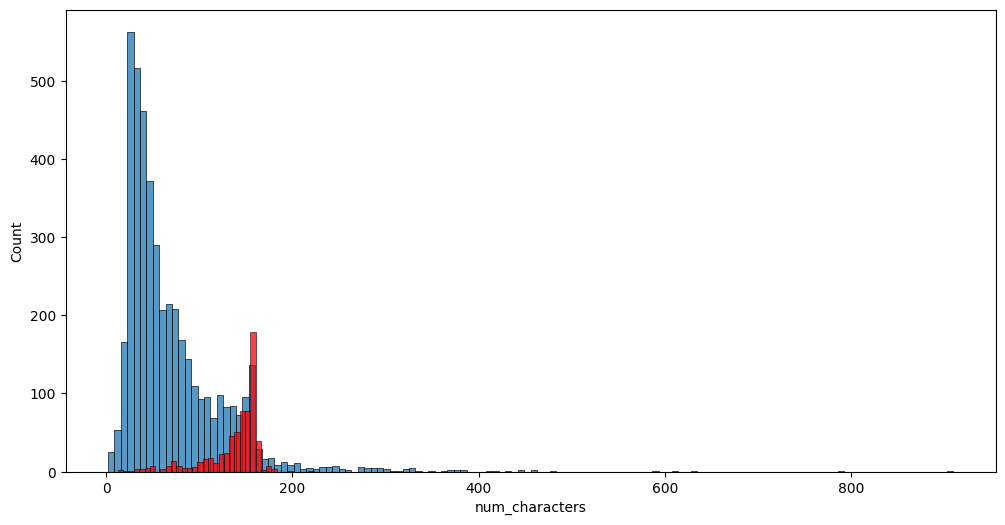

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

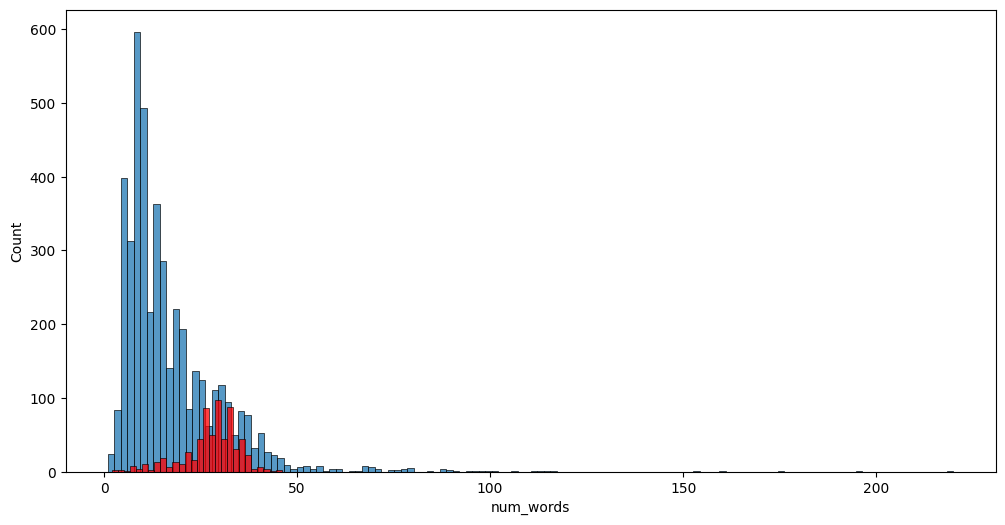

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

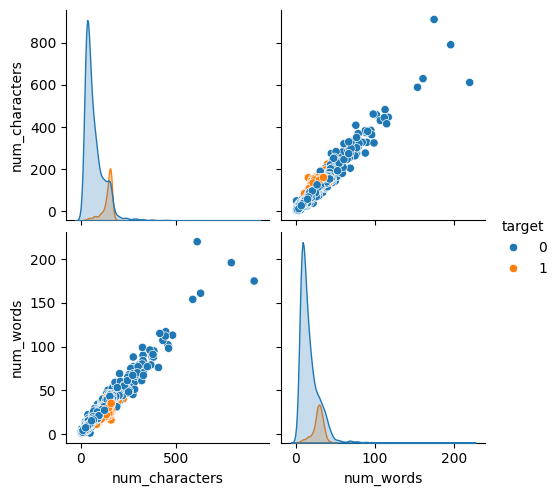

In [29]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Stemming

In [30]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [31]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)

In [33]:
df.head()

,target,text,num_characters,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah i do think he goe to usf he live around he...


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

## WordCloud for Spam

In [35]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

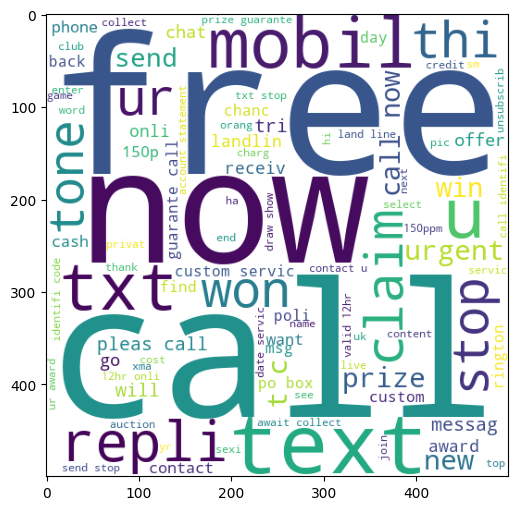

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

## WordCloud for Ham

In [37]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

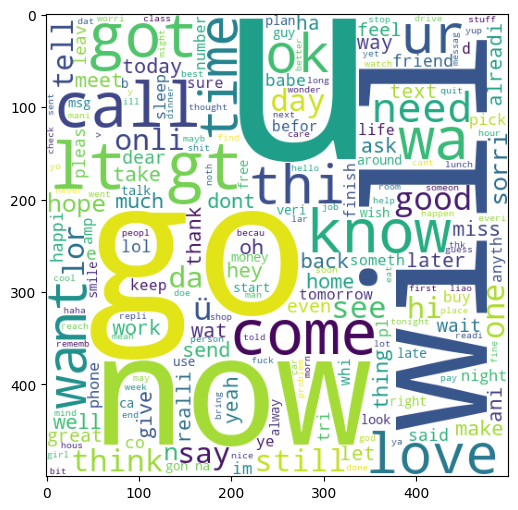

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
df1=df.drop(['text'],axis=1)

In [40]:
df1['text'] = df1['transformed_text']
df1=df1.drop(['transformed_text'],axis=1)

In [41]:
df1

,target,num_characters,num_words,text
0,0,111,24,go until jurong point crazi avail onli in bugi...
1,0,29,8,ok lar joke wif u oni
2,1,155,37,free entri in 2 a wkli comp to win fa cup fina...
3,0,49,13,u dun say so earli hor u c alreadi then say
4,0,61,15,nah i do think he goe to usf he live around he...
...,...,...,...,...
5164,1,160,35,thi is the 2nd time we have tri 2 contact u ha...
5165,0,36,9,will ü b go to esplanad fr home
5166,0,57,15,piti wa in mood for that so ani other suggest
5167,0,125,27,the guy did some bitch but i act like i be int...


In [42]:
def split_data(df):
    """Split the data into train, validation, and test sets."""
    train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])
    train, validation = train_test_split(train, test_size=0.1, random_state=42, stratify=train['target'])
    return train, validation, test

def save_data_splits(train, validation, test):
    """Save the train, validation, and test splits into CSV files."""
    train.to_csv('train.csv', index=False)
    validation.to_csv('validation.csv', index=False)
    test.to_csv('test.csv', index=False)

In [43]:
train, validation, test = split_data(df1)
save_data_splits(train, validation, test)